In [117]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")

In [118]:
# Reading CSVs

df1=pd.read_csv("1980.csv")
df2=pd.read_csv("1985.csv")

In [119]:
def getDataForLorenz(df):
    
    GDPperCapita = np.array([])
    for i in range(df['Year'].count()):
        GDPperCapita = np.append(GDPperCapita, df['Real GDP(in milllion $)'][i]/df['Population (in millions)'][i])
    
    sortedGDPperCapita = np.sort(GDPperCapita)
    
    CumulatedGDPperCapita = sortedGDPperCapita.cumsum()/sortedGDPperCapita.sum()
    
    return CumulatedGDPperCapita

In [120]:
def plotLorenz(arr, year):    
    x = np.linspace(1/156, 1, 156)
    
    plt.plot(x, arr)
    plt.plot([0,1], [0,1], color = 'black', linewidth = 1)
    plt.title('Lorenz Curve for the Year ' + str(year))
    plt.ylabel('Cumulative GDP per Capita') 
    plt.xlabel('Cumulative % of Countries')

In [121]:
def plotBothLorenz(arr1, label1, arr2, label2):
    x = np.linspace(1/156, 1, 156)
    
    plt.plot(x, arr1, label = str(label1))
    plt.plot(x, arr2, label = str(label2))
    plt.plot([0,1], [0,1], color = 'black', linewidth = 1)
    plt.ylabel('Cumulative GDP per Capita')
    plt.xlabel('Cumulative % of Countries') 
    plt.legend()

In [122]:
def calculateGini(arr):
    x = np.linspace(1/156, 1, 156)
    
    area = 0
    for i in range(len(arr) - 1):
        temp = (x[i+1] - x[i])*(arr[i+1] + arr[i])/2
        area += temp
        
    gini = (0.5 - area)/0.5
    return gini

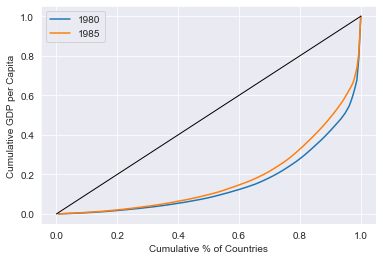

In [123]:
lorenz_1980 = getDataForLorenz(df1)
lorenz_1985 = getDataForLorenz(df2)

plotBothLorenz(lorenz_1980, 1980, lorenz_1985, 1985)

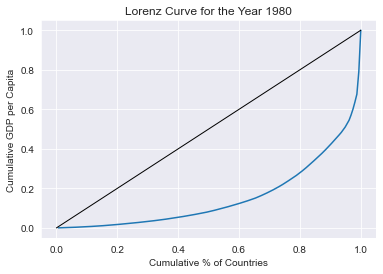

In [124]:
lorenz_1980 = getDataForLorenz(df1)
plotLorenz(lorenz_1980, 1980)

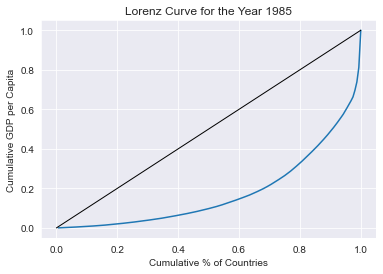

In [125]:
lorenz_1985 = getDataForLorenz(df2)
plotLorenz(lorenz_1985, 1985)

In [126]:
print('Gini Coefficient of the Year 1980 is', calculateGini(lorenz_1980))
print('Gini Coefficient of the Year 1985 is', calculateGini(lorenz_1985))

Gini Coefficient of the Year 1980 is 0.6943305599590162
Gini Coefficient of the Year 1985 is 0.6467756056990034
